<a href="https://colab.research.google.com/github/Aishaamalik/Climate-Change-Prediction/blob/main/PROJECT_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CLIMATE CHANGE DATA
----


# 1: Exploration

## 1: IMPORT REQUIRED LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2: FUNCTION TO LOAD & EXPLORE THE DATASET

In [10]:
def load_and_explore_data(file_path='climate_change_dataset.csv'):
    """Load and explore the climate change dataset"""

    print("="*60)
    print("CLIMATE CHANGE DATA EXPLORATION")
    print("="*60)

    print("\n1. Loading dataset...")
    df = pd.read_csv(file_path)
    print(f"✓ Dataset loaded successfully with shape: {df.shape}")

    print(f"\n2. Dataset Overview:")
    print(f"   - Rows: {len(df)}")
    print(f"   - Columns: {len(df.columns)}")
    print(f"   - Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

    print(f"\n3. Column Information:")
    print(df.info())

    print(f"\n4. First 5 rows:")
    print(df.head())

    print(f"\n5. Statistical Summary:")
    print(df.describe())

    print(f"\n6. Missing Values:")
    missing_values = df.isnull().sum()
    if missing_values.sum() == 0:
        print("✓ No missing values found!")
    else:
        print(missing_values[missing_values > 0])

    print(f"\n7. Unique values per column:")
    for col in df.columns:
        unique_count = df[col].nunique()
        print(f"   {col}: {unique_count} unique values")

        if df[col].dtype == 'object' and unique_count <= 20:
            print(f"      Values: {list(df[col].unique())}")

    return df
df = load_and_explore_data()

CLIMATE CHANGE DATA EXPLORATION

1. Loading dataset...
✓ Dataset loaded successfully with shape: (1000, 10)

2. Dataset Overview:
   - Rows: 1000
   - Columns: 10
   - Memory usage: 0.13 MB

3. Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         1000 non-null   int64  
 1   Country                      1000 non-null   object 
 2   Avg Temperature (°C)         1000 non-null   float64
 3   CO2 Emissions (Tons/Capita)  1000 non-null   float64
 4   Sea Level Rise (mm)          1000 non-null   float64
 5   Rainfall (mm)                1000 non-null   int64  
 6   Population                   1000 non-null   int64  
 7   Renewable Energy (%)         1000 non-null   float64
 8   Extreme Weather Events       1000 non-null   int64  
 9   Forest Area (%)              1000 non

## 3: Analyze Countries and Time Period

In [11]:
def analyze_country_year(df):
    print(f"\n8. Countries in dataset:")
    country_counts = df['Country'].value_counts()
    print(f"   Total countries: {len(country_counts)}")
    print(f"   Records per country:")
    print(country_counts)

    print(f"\n9. Time period analysis:")
    print(f"   Year range: {df['Year'].min()} - {df['Year'].max()}")
    print(f"   Total years covered: {df['Year'].nunique()}")
    year_counts = df['Year'].value_counts().sort_index()
    print(f"   Records per year range:")
    print(f"   Min records in a year: {year_counts.min()}")
    print(f"   Max records in a year: {year_counts.max()}")
    print(f"   Average records per year: {year_counts.mean():.1f}")
analyze_country_year(df)


8. Countries in dataset:
   Total countries: 15
   Records per country:
Country
Indonesia       75
Russia          74
USA             73
South Africa    73
India           70
China           67
Argentina       67
Canada          67
Brazil          67
France          66
UK              65
Japan           63
Germany         61
Australia       57
Mexico          55
Name: count, dtype: int64

9. Time period analysis:
   Year range: 2000 - 2023
   Total years covered: 24
   Records per year range:
   Min records in a year: 30
   Max records in a year: 53
   Average records per year: 41.7


## 4: Climate Statistics Summary

In [13]:
def summarize_climate_stats(df):
    print(f"\n10. Key Climate Statistics:")

    print(f"    Temperature:")
    print(f"      - Average: {df['Avg Temperature (°C)'].mean():.2f}°C")
    print(f"      - Range: {df['Avg Temperature (°C)'].min():.2f}°C to {df['Avg Temperature (°C)'].max():.2f}°C")
    print(f"      - Standard deviation: {df['Avg Temperature (°C)'].std():.2f}°C")

    print(f"    CO2 Emissions:")
    print(f"      - Average: {df['CO2 Emissions (Tons/Capita)'].mean():.2f} tons/capita")
    print(f"      - Range: {df['CO2 Emissions (Tons/Capita)'].min():.2f} to {df['CO2 Emissions (Tons/Capita)'].max():.2f} tons/capita")

    print(f"    Renewable Energy:")
    print(f"      - Average: {df['Renewable Energy (%)'].mean():.2f}%")
    print(f"      - Range: {df['Renewable Energy (%)'].min():.2f}% to {df['Renewable Energy (%)'].max():.2f}%")

    print(f"    Forest Area:")
    print(f"      - Average: {df['Forest Area (%)'].mean():.2f}%")
    print(f"      - Range: {df['Forest Area (%)'].min():.2f}% to {df['Forest Area (%)'].max():.2f}%")
summarize_climate_stats(df)



10. Key Climate Statistics:
    Temperature:
      - Average: 19.88°C
      - Range: 5.00°C to 34.90°C
      - Standard deviation: 8.54°C
    CO2 Emissions:
      - Average: 10.43 tons/capita
      - Range: 0.50 to 20.00 tons/capita
    Renewable Energy:
      - Average: 27.30%
      - Range: 5.10% to 50.00%
    Forest Area:
      - Average: 40.57%
      - Range: 10.10% to 70.00%


## 5: Data Quality Checks

In [17]:
def check_data_quality(df):
    print(f"\n11. Data Quality Checks:")

    duplicates = df.duplicated().sum()
    print(f"    Duplicate rows: {duplicates}")

    negative_checks = {
        'CO2 Emissions (Tons/Capita)': (df['CO2 Emissions (Tons/Capita)'] < 0).sum(),
        'Renewable Energy (%)': (df['Renewable Energy (%)'] < 0).sum(),
        'Forest Area (%)': (df['Forest Area (%)'] < 0).sum(),
        'Population': (df['Population'] < 0).sum()
    }

    print(f"    Negative values check:")
    for col, count in negative_checks.items():
        print(f"      {col}: {count} negative values")

    print(f"    Range validation:")
    renewable_over_100 = (df['Renewable Energy (%)'] > 100).sum()
    forest_over_100 = (df['Forest Area (%)'] > 100).sum()
    print(f"      Renewable Energy > 100%: {renewable_over_100}")
    print(f"      Forest Area > 100%: {forest_over_100}")
check_data_quality(df)




11. Data Quality Checks:
    Duplicate rows: 0
    Negative values check:
      CO2 Emissions (Tons/Capita): 0 negative values
      Renewable Energy (%): 0 negative values
      Forest Area (%): 0 negative values
      Population: 0 negative values
    Range validation:
      Renewable Energy > 100%: 0
      Forest Area > 100%: 0


## 6: Correlation Analysis

In [19]:
def correlation_with_temperature(df):
    print(f"\n12. Quick Correlation Analysis:")
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    temp_correlations = df[numerical_cols].corr()['Avg Temperature (°C)'].sort_values(ascending=False)

    print(f"    Correlations with Temperature:")
    for col, corr in temp_correlations.items():
        if col != 'Avg Temperature (°C)':
            print(f"      {col}: {corr:.3f}")
correlation_with_temperature(df)




12. Quick Correlation Analysis:
    Correlations with Temperature:
      Sea Level Rise (mm): 0.059
      Extreme Weather Events: 0.035
      Year: 0.021
      CO2 Emissions (Tons/Capita): 0.012
      Population: 0.004
      Rainfall (mm): -0.005
      Forest Area (%): -0.017
      Renewable Energy (%): -0.065


## 7: Summary Report

In [20]:
def print_summary(df):
    summary = {
        'total_records': len(df),
        'total_columns': len(df.columns),
        'countries': df['Country'].nunique(),
        'year_range': f"{df['Year'].min()}-{df['Year'].max()}",
        'missing_values': df.isnull().sum().sum(),
        'duplicates': df.duplicated().sum(),
        'avg_temperature': df['Avg Temperature (°C)'].mean(),
        'avg_co2': df['CO2 Emissions (Tons/Capita)'].mean(),
        'avg_renewable': df['Renewable Energy (%)'].mean()
    }

    print(f"\n" + "="*50)
    print("EXPLORATION SUMMARY")
    print("="*50)
    for key, value in summary.items():
        print(f"{key.replace('_', ' ').title()}: {value}")
print_summary(df)


EXPLORATION SUMMARY
Total Records: 1000
Total Columns: 10
Countries: 15
Year Range: 2000-2023
Missing Values: 0
Duplicates: 0
Avg Temperature: 19.8831
Avg Co2: 10.425799999999999
Avg Renewable: 27.3005


## 8: Creating Basic Plots


13. Creating basic exploratory plots...


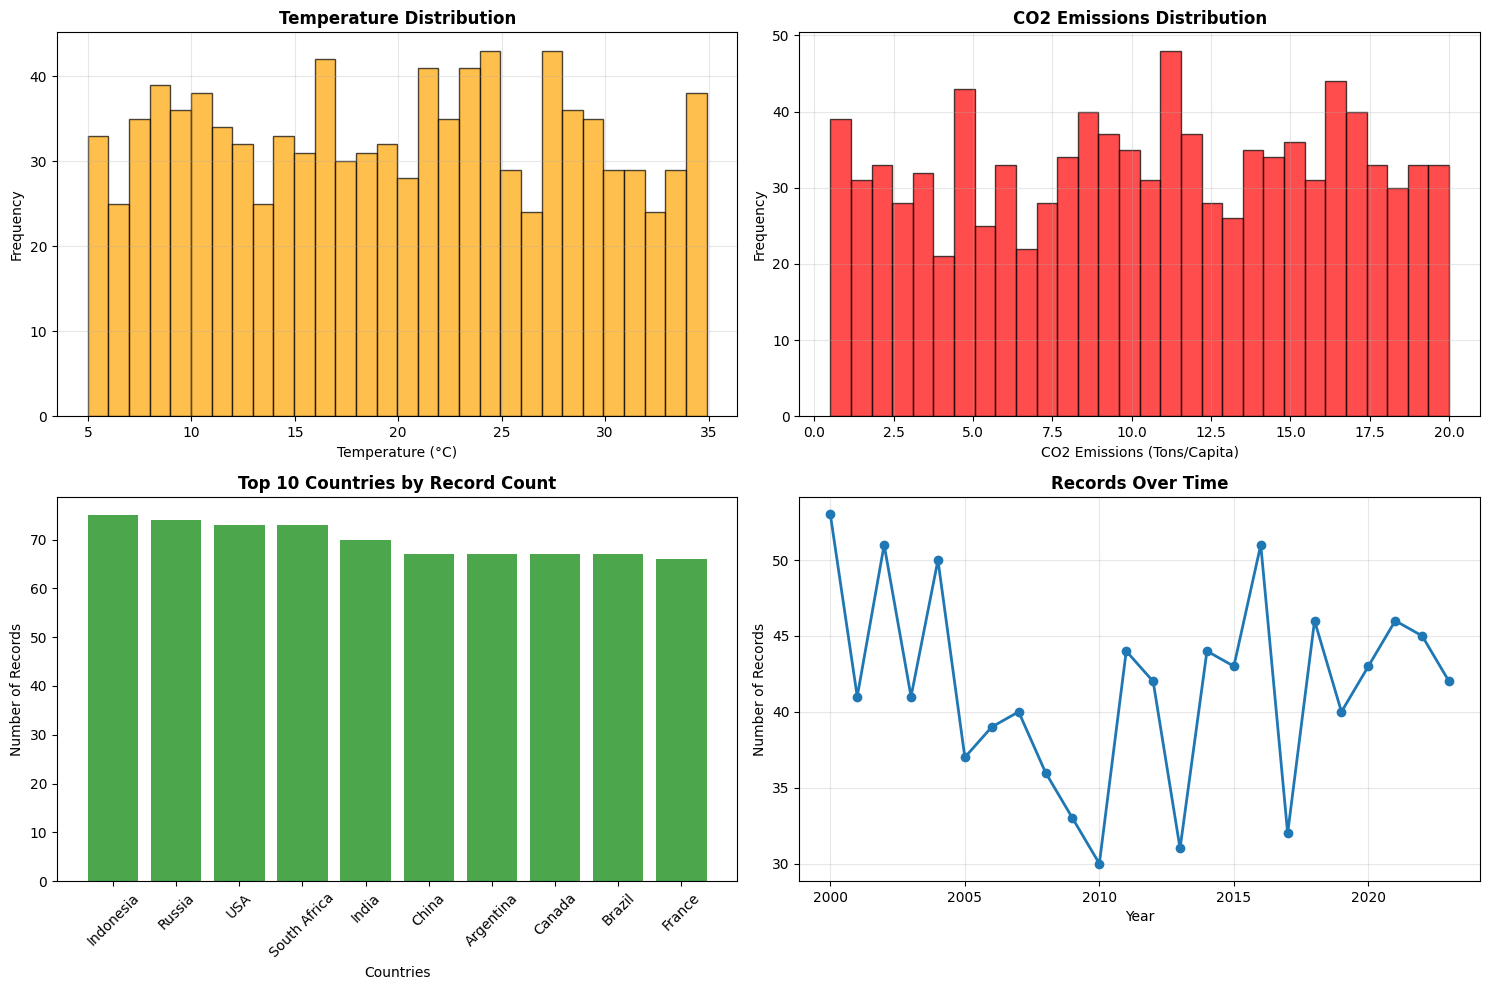

In [22]:
def create_basic_plots(df):
    print(f"\n13. Creating basic exploratory plots...")

    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    axes[0, 0].hist(df['Avg Temperature (°C)'], bins=30, alpha=0.7, color='orange', edgecolor='black')
    axes[0, 0].set_title('Temperature Distribution', fontweight='bold')
    axes[0, 0].set_xlabel('Temperature (°C)')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].grid(True, alpha=0.3)

    axes[0, 1].hist(df['CO2 Emissions (Tons/Capita)'], bins=30, alpha=0.7, color='red', edgecolor='black')
    axes[0, 1].set_title('CO2 Emissions Distribution', fontweight='bold')
    axes[0, 1].set_xlabel('CO2 Emissions (Tons/Capita)')
    axes[0, 1].set_ylabel('Frequency')
    axes[0, 1].grid(True, alpha=0.3)

    top_countries = df['Country'].value_counts().head(10)
    axes[1, 0].bar(range(len(top_countries)), top_countries.values, color='green', alpha=0.7)
    axes[1, 0].set_title('Top 10 Countries by Record Count', fontweight='bold')
    axes[1, 0].set_xlabel('Countries')
    axes[1, 0].set_ylabel('Number of Records')
    axes[1, 0].set_xticks(range(len(top_countries)))
    axes[1, 0].set_xticklabels(top_countries.index, rotation=45)

    year_counts = df['Year'].value_counts().sort_index()
    axes[1, 1].plot(year_counts.index, year_counts.values, marker='o', linewidth=2)
    axes[1, 1].set_title('Records Over Time', fontweight='bold')
    axes[1, 1].set_xlabel('Year')
    axes[1, 1].set_ylabel('Number of Records')
    axes[1, 1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()
create_basic_plots(df)



----

# 2: Data Cleaning and PreProcessing

### 1: IMPORT LIBRARIES

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

warnings.filterwarnings('ignore')


### 2: LOAD DATA

In [26]:
def load_data(file_path='climate_change_dataset.csv'):
    """Load the dataset for cleaning"""
    print("DATA CLEANING AND PREPROCESSING")

    print("\n1. Loading dataset...")
    df = pd.read_csv(file_path)
    print(f"✓ Dataset loaded with shape: {df.shape}")
    return df
df_original = load_data()


DATA CLEANING AND PREPROCESSING

1. Loading dataset...
✓ Dataset loaded with shape: (1000, 10)


### 3: HANDLING MISSING VALUES

In [28]:

def handle_missing_values(df):
    """Handle missing values in the dataset"""
    print("\n2. Checking for missing values...")

    missing_values = df.isnull().sum()
    missing_percentage = (missing_values / len(df)) * 100

    if missing_values.sum() == 0:
        print("✓ No missing values found!")
        return df, {}

    print("Missing values found:")
    missing_info = {}
    for col in missing_values[missing_values > 0].index:
        count = missing_values[col]
        percentage = missing_percentage[col]
        print(f"  {col}: {count} ({percentage:.2f}%)")
        missing_info[col] = {'count': count, 'percentage': percentage}

    df_clean = df.copy()
    strategies_applied = {}

    for col in missing_info.keys():
        if missing_info[col]['percentage'] < 5:
            if df[col].dtype in ['int64', 'float64']:
                median_val = df[col].median()
                df_clean[col].fillna(median_val, inplace=True)
                strategies_applied[col] = f"Filled with median: {median_val:.2f}"
            else:
                mode_val = df[col].mode()[0]
                df_clean[col].fillna(mode_val, inplace=True)
                strategies_applied[col] = f"Filled with mode: {mode_val}"
        elif missing_info[col]['percentage'] < 15:
            df_clean[col].fillna(method='ffill', inplace=True)
            df_clean[col].fillna(method='bfill', inplace=True)
            strategies_applied[col] = "Forward/backward fill applied"
        else:
            if df[col].dtype == 'object':
                df_clean[col].fillna('Unknown', inplace=True)
                strategies_applied[col] = "Filled with 'Unknown'"
            else:
                df_clean[col].fillna(df[col].mean(), inplace=True)
                strategies_applied[col] = f"Filled with mean: {df[col].mean():.2f}"

    print("\nStrategies applied:")
    for col, strategy in strategies_applied.items():
        print(f"  {col}: {strategy}")

    return df_clean, strategies_applied
df_clean, missing_strategies = handle_missing_values(df_original)



2. Checking for missing values...
✓ No missing values found!


### 4: HANDLING DUPLICATES

In [29]:
def handle_duplicates(df):
    """Handle duplicate records"""
    print("\n3. Checking for duplicate records...")

    duplicates = df.duplicated()
    duplicate_count = duplicates.sum()

    if duplicate_count == 0:
        print("✓ No duplicate records found!")
        return df, 0

    print(f"Found {duplicate_count} duplicate records")

    df_clean = df.drop_duplicates()

    print(f"✓ Removed {duplicate_count} duplicate records")
    print(f"Dataset shape after removing duplicates: {df_clean.shape}")

    return df_clean, duplicate_count
df_clean, duplicates_removed = handle_duplicates(df_clean)



3. Checking for duplicate records...
✓ No duplicate records found!


### 5: DETECT OUTLINERS

In [30]:
def detect_outliers(df):
    """Detect outliers using multiple methods"""
    print("\n4. Detecting outliers...")

    numerical_cols = df.select_dtypes(include=[np.number]).columns
    outliers_info = {}

    for col in numerical_cols:
        if col in ['Year']:
            continue

        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        iqr_outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index

        z_scores = np.abs(stats.zscore(df[col]))
        z_outliers = df[z_scores > 3].index

        combined_outliers = list(set(iqr_outliers) | set(z_outliers))

        outliers_info[col] = {
            'count': len(combined_outliers),
            'percentage': (len(combined_outliers) / len(df)) * 100,
            'indices': combined_outliers,
            'bounds': {'lower': lower_bound, 'upper': upper_bound}
        }

        print(f"  {col}: {len(combined_outliers)} outliers ({outliers_info[col]['percentage']:.2f}%)")

    return outliers_info
outliers_info = detect_outliers(df_clean)


4. Detecting outliers...
  Avg Temperature (°C): 0 outliers (0.00%)
  CO2 Emissions (Tons/Capita): 0 outliers (0.00%)
  Sea Level Rise (mm): 0 outliers (0.00%)
  Rainfall (mm): 0 outliers (0.00%)
  Population: 0 outliers (0.00%)
  Renewable Energy (%): 0 outliers (0.00%)
  Extreme Weather Events: 0 outliers (0.00%)
  Forest Area (%): 0 outliers (0.00%)


### 6: HANDLE OUTLIERS

In [31]:

def handle_outliers(df, outliers_details, method='cap'):
    """Handle outliers in the dataset"""
    print(f"\n5. Handling outliers using {method} method...")

    df_clean = df.copy()
    outliers_handled = {}

    for col, details in outliers_details.items():
        if details['count'] == 0:
            continue

        if method == 'cap':
            lower_bound = details['bounds']['lower']
            upper_bound = details['bounds']['upper']

            original_count = len(df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)])

            df_clean[col] = np.clip(df_clean[col], lower_bound, upper_bound)

            outliers_handled[col] = f"Capped {original_count} values to [{lower_bound:.2f}, {upper_bound:.2f}]"

        elif method == 'remove':
            mask = ~df_clean.index.isin(details['indices'])
            df_clean = df_clean[mask]
            outliers_handled[col] = f"Removed {len(details['indices'])} outlier rows"

    print("Outliers handled:")
    for col, action in outliers_handled.items():
        print(f"  {col}: {action}")

    return df_clean, outliers_handled
df_clean, outliers_handled = handle_outliers(df_clean, outliers_info, method='cap')



5. Handling outliers using cap method...
Outliers handled:


###  7: VALIDATE DATA RANGES

In [32]:

def validate_data_ranges(df):
    """Validate data ranges and fix unrealistic values"""
    print("\n6. Validating data ranges...")

    validation_issues = {}
    df_clean = df.copy()

    temp_col = 'Avg Temperature (°C)'
    if temp_col in df.columns:
        extreme_temps = df_clean[(df_clean[temp_col] < -50) | (df_clean[temp_col] > 50)]
        if len(extreme_temps) > 0:
            validation_issues[temp_col] = f"Found {len(extreme_temps)} extreme temperature values"
            print(f"  Warning: {len(extreme_temps)} extreme temperature values found")

    percentage_cols = ['Renewable Energy (%)', 'Forest Area (%)']
    for col in percentage_cols:
        if col in df.columns:
            invalid_percent = df_clean[(df_clean[col] < 0) | (df_clean[col] > 100)]
            if len(invalid_percent) > 0:
                validation_issues[col] = f"Found {len(invalid_percent)} invalid percentage values"
                print(f"  Warning: {len(invalid_percent)} invalid percentage values in {col}")
                df_clean[col] = np.clip(df_clean[col], 0, 100)

    pop_col = 'Population'
    if pop_col in df.columns:
        negative_pop = df_clean[df_clean[pop_col] <= 0]
        if len(negative_pop) > 0:
            validation_issues[pop_col] = f"Found {len(negative_pop)} negative/zero population values"
            print(f"  Warning: {len(negative_pop)} negative/zero population values")

    co2_col = 'CO2 Emissions (Tons/Capita)'
    if co2_col in df.columns:
        negative_co2 = df_clean[df_clean[co2_col] < 0]
        if len(negative_co2) > 0:
            validation_issues[co2_col] = f"Found {len(negative_co2)} negative CO2 values"
            print(f"  Warning: {len(negative_co2)} negative CO2 emission values")
            df_clean.loc[df_clean[co2_col] < 0, co2_col] = 0

    if not validation_issues:
        print("✓ All data ranges are valid!")

    return df_clean, validation_issues
df_clean, validation_issues = validate_data_ranges(df_clean)



6. Validating data ranges...
✓ All data ranges are valid!


### 8: FIX DATA QUALITY ISSSUES

In [33]:

def fix_data_issues(df):
    """Fix specific data quality issues"""
    print("\n7. Fixing data quality issues...")

    df_clean = df.copy()
    fixes_applied = []

    if 'Year' in df.columns:
        if df_clean['Year'].dtype == 'object':
            df_clean['Year'] = pd.to_numeric(df_clean['Year'], errors='coerce')
            fixes_applied.append("Converted Year column to numeric")

    if 'Country' in df.columns:
        df_clean['Country'] = df_clean['Country'].str.strip()
        original_countries = df_clean['Country'].nunique()

        country_counts_before = len(df_clean['Country'].unique())
        df_clean['Country'] = df_clean['Country'].str.title()
        country_counts_after = len(df_clean['Country'].unique())

        if country_counts_before != country_counts_after:
            fixes_applied.append(f"Standardized country names: {country_counts_before} -> {country_counts_after}")

    numerical_cols = df_clean.select_dtypes(include=[np.number]).columns
    for col in numerical_cols:
        if col == 'Year' or col == 'Population':
            df_clean[col] = df_clean[col].round(0).astype('int64')
        elif 'Temperature' in col:
            df_clean[col] = df_clean[col].round(1)
        elif '%' in col:
            df_clean[col] = df_clean[col].round(1)
        else:
            df_clean[col] = df_clean[col].round(2)

    fixes_applied.append("Rounded numerical values to appropriate decimal places")

    if 'Sea Level Rise (mm)' in df_clean.columns:
        extreme_sea_level = df_clean[df_clean['Sea Level Rise (mm)'] > 10]
        if len(extreme_sea_level) > 0:
            median_sea_level = df_clean['Sea Level Rise (mm)'].median()
            df_clean.loc[df_clean['Sea Level Rise (mm)'] > 10, 'Sea Level Rise (mm)'] = median_sea_level
            fixes_applied.append(f"Fixed {len(extreme_sea_level)} extreme sea level rise values")

    print("Data quality fixes applied:")
    for fix in fixes_applied:
        print(f"  ✓ {fix}")

    return df_clean, fixes_applied
df_clean, fixes_applied = fix_data_issues(df_clean)



7. Fixing data quality issues...
Data quality fixes applied:
  ✓ Rounded numerical values to appropriate decimal places


### 9: CLEANING VISUALIZATION


8. Creating data cleaning visualization plots...


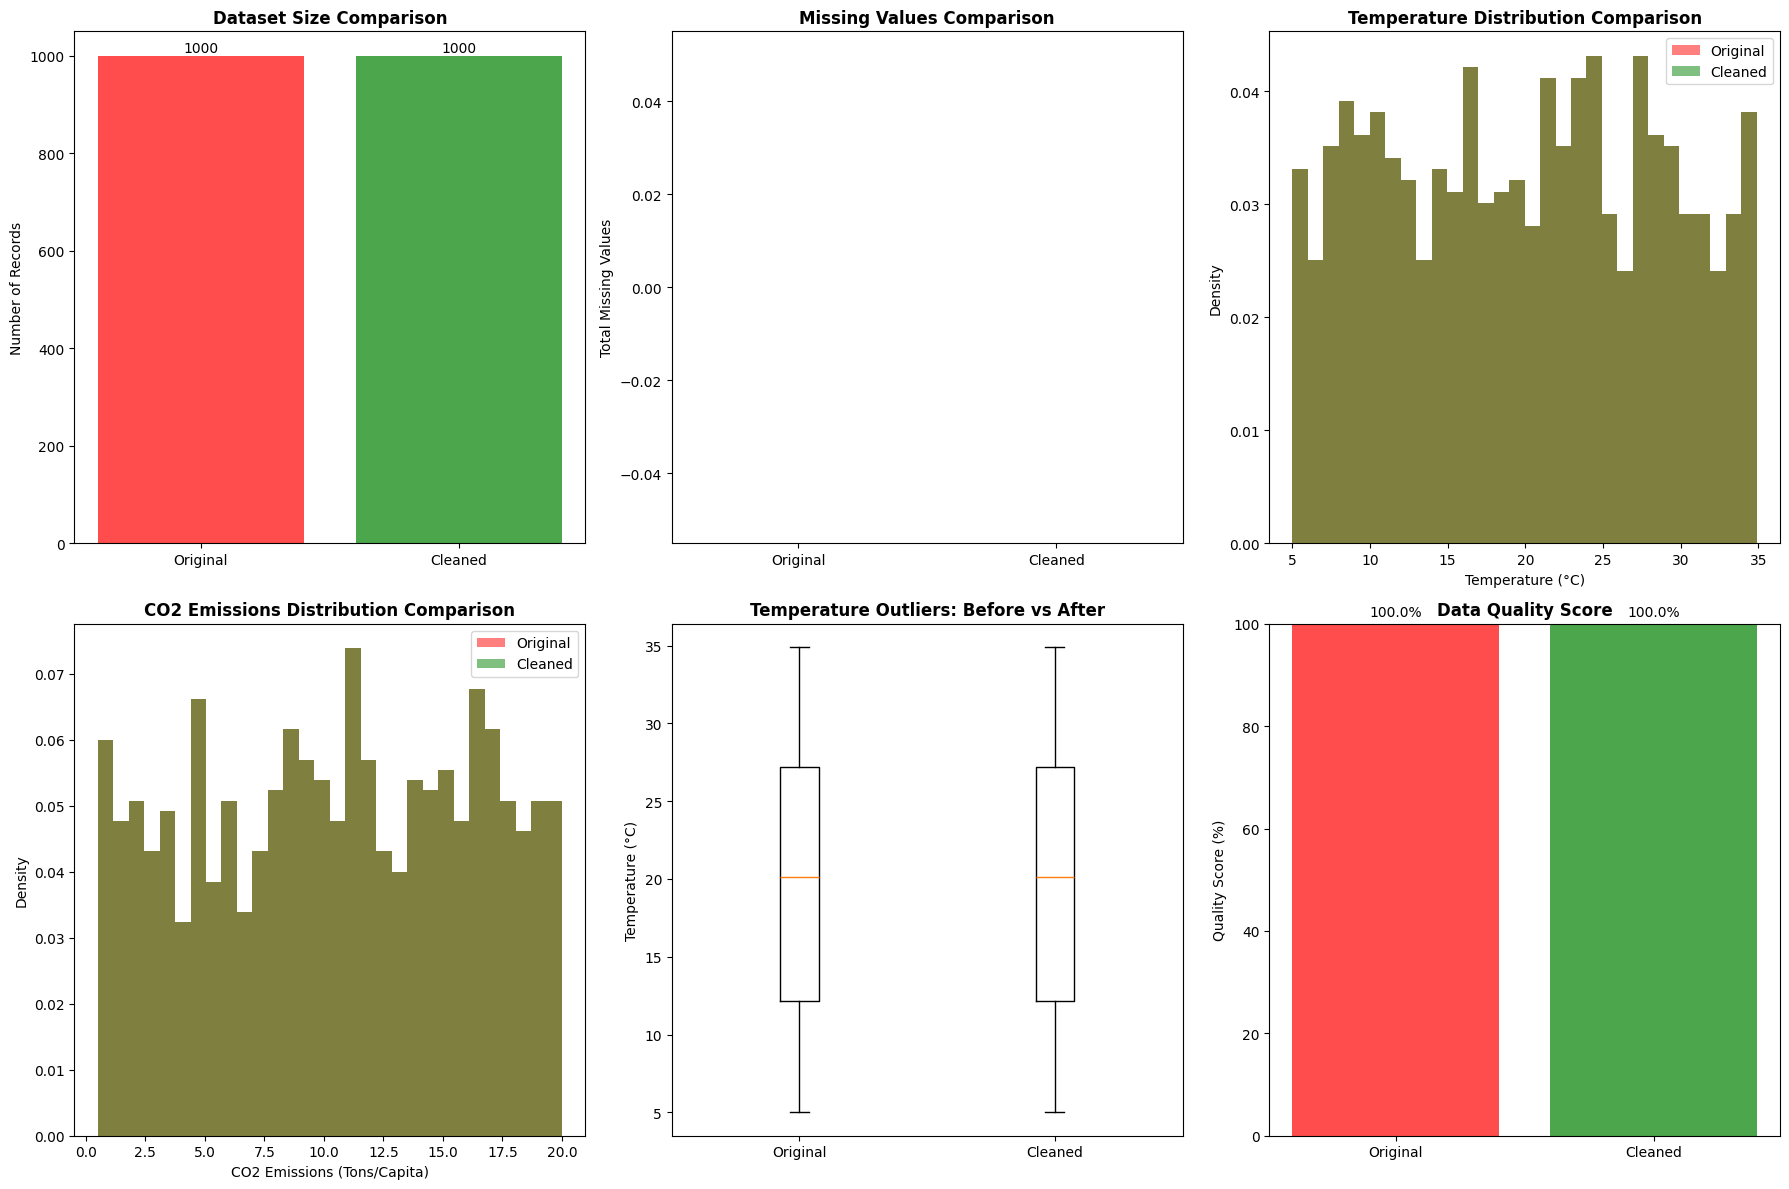

In [36]:

def create_cleaning_plots(df_original, df_clean):
    """Create plots to visualize the cleaning process"""
    print("\n8. Creating data cleaning visualization plots...")

    fig, axes = plt.subplots(2, 3, figsize=(18, 12))

    categories = ['Original', 'Cleaned']
    shapes = [df_original.shape[0], df_clean.shape[0]]
    axes[0, 0].bar(categories, shapes, color=['red', 'green'], alpha=0.7)
    axes[0, 0].set_title('Dataset Size Comparison', fontweight='bold')
    axes[0, 0].set_ylabel('Number of Records')
    for i, v in enumerate(shapes):
        axes[0, 0].text(i, v + 0.5, str(v), ha='center', va='bottom')

    missing_original = df_original.isnull().sum().sum()
    missing_clean = df_clean.isnull().sum().sum()
    axes[0, 1].bar(['Original', 'Cleaned'], [missing_original, missing_clean],
                   color=['orange', 'blue'], alpha=0.7)
    axes[0, 1].set_title('Missing Values Comparison', fontweight='bold')
    axes[0, 1].set_ylabel('Total Missing Values')

    axes[0, 2].hist(df_original['Avg Temperature (°C)'], bins=30, alpha=0.5,
                    label='Original', color='red', density=True)
    axes[0, 2].hist(df_clean['Avg Temperature (°C)'], bins=30, alpha=0.5,
                    label='Cleaned', color='green', density=True)
    axes[0, 2].set_title('Temperature Distribution Comparison', fontweight='bold')
    axes[0, 2].set_xlabel('Temperature (°C)')
    axes[0, 2].set_ylabel('Density')
    axes[0, 2].legend()

    axes[1, 0].hist(df_original['CO2 Emissions (Tons/Capita)'], bins=30, alpha=0.5,
                    label='Original', color='red', density=True)
    axes[1, 0].hist(df_clean['CO2 Emissions (Tons/Capita)'], bins=30, alpha=0.5,
                    label='Cleaned', color='green', density=True)
    axes[1, 0].set_title('CO2 Emissions Distribution Comparison', fontweight='bold')
    axes[1, 0].set_xlabel('CO2 Emissions (Tons/Capita)')
    axes[1, 0].set_ylabel('Density')
    axes[1, 0].legend()

    axes[1, 1].boxplot([df_original['Avg Temperature (°C)'], df_clean['Avg Temperature (°C)']],
                       labels=['Original', 'Cleaned'])
    axes[1, 1].set_title('Temperature Outliers: Before vs After', fontweight='bold')
    axes[1, 1].set_ylabel('Temperature (°C)')

    original_score = calculate_data_quality_score(df_original)
    clean_score = calculate_data_quality_score(df_clean)

    axes[1, 2].bar(['Original', 'Cleaned'], [original_score, clean_score],
                   color=['red', 'green'], alpha=0.7)
    axes[1, 2].set_title('Data Quality Score', fontweight='bold')
    axes[1, 2].set_ylabel('Quality Score (%)')
    axes[1, 2].set_ylim(0, 100)
    for i, v in enumerate([original_score, clean_score]):
        axes[1, 2].text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

def calculate_data_quality_score(df):
    """Calculate a simple data quality score"""
    total_cells = df.shape[0] * df.shape[1]
    missing_cells = df.isnull().sum().sum()

    completeness_score = ((total_cells - missing_cells) / total_cells) * 100

    return completeness_score

create_cleaning_plots(df_original, df_clean)



### 10: QUALITY SCORING

In [39]:

def generate_cleaning_report(df_original, df_clean, fixes_applied):
    """Generate a comprehensive cleaning report"""
    print("DATA CLEANING REPORT")

    print(f"\nOriginal dataset shape: {df_original.shape}")
    print(f"Cleaned dataset shape: {df_clean.shape}")
    print(f"Records removed: {df_original.shape[0] - df_clean.shape[0]}")

    print(f"\nMissing values:")
    print(f"  Original: {df_original.isnull().sum().sum()}")
    print(f"  Cleaned: {df_clean.isnull().sum().sum()}")

    print(f"\nDuplicate records:")
    print(f"  Original: {df_original.duplicated().sum()}")
    print(f"  Cleaned: {df_clean.duplicated().sum()}")

    print(f"\nData quality score:")
    original_score = calculate_data_quality_score(df_original)
    clean_score = calculate_data_quality_score(df_clean)
    print(f"  Original: {original_score:.2f}%")
    print(f"  Cleaned: {clean_score:.2f}%")
    print(f"  Improvement: {clean_score - original_score:.2f}%")

    print(f"\nData cleaning actions performed:")
    for fix in fixes_applied:
        print(f"  ✓ {fix}")

    print(f"\nStatistical comparison for key variables:")
    key_vars = ['Avg Temperature (°C)', 'CO2 Emissions (Tons/Capita)', 'Renewable Energy (%)']

    for var in key_vars:
        if var in df_original.columns and var in df_clean.columns:
            print(f"\n  {var}:")
            print(f"    Original - Mean: {df_original[var].mean():.2f}, Std: {df_original[var].std():.2f}")
            print(f"    Cleaned  - Mean: {df_clean[var].mean():.2f}, Std: {df_clean[var].std():.2f}")

generate_cleaning_report(df_original, df_clean, fixes_applied)



DATA CLEANING REPORT

Original dataset shape: (1000, 10)
Cleaned dataset shape: (1000, 10)
Records removed: 0

Missing values:
  Original: 0
  Cleaned: 0

Duplicate records:
  Original: 0
  Cleaned: 0

Data quality score:
  Original: 100.00%
  Cleaned: 100.00%
  Improvement: 0.00%

Data cleaning actions performed:
  ✓ Rounded numerical values to appropriate decimal places

Statistical comparison for key variables:

  Avg Temperature (°C):
    Original - Mean: 19.88, Std: 8.54
    Cleaned  - Mean: 19.88, Std: 8.54

  CO2 Emissions (Tons/Capita):
    Original - Mean: 10.43, Std: 5.61
    Cleaned  - Mean: 10.43, Std: 5.61

  Renewable Energy (%):
    Original - Mean: 27.30, Std: 12.97
    Cleaned  - Mean: 27.30, Std: 12.97
